In [2]:

import requests
import json
import re
import pandas as pd
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')



[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jessicagroven/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/jessicagroven/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [3]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


In [4]:
#Import AllTextData.csv
textData = pd.read_csv("AllTextData.csv")
textData = textData.drop('Unnamed: 0', axis=1)
textData = textData[textData['Sentiment'] != "remove"]

textData = textData.reset_index()
textData = textData.drop(['index','Type'], axis=1)

textData

,Sentiment,Content
0,pos,The vision I want people to understand that ve...
1,neg,All is quiet at a m on a Thursday in Shibuya T...
2,neg,ADVERTISEMENT Healthy eating and nutrition are...
3,neg,LEAN RED MEAT A gut healthy heart smart choice...
4,neg,Why Vegans Don t Eat Honey Honey is a sweet vi...
...,...,...
148,pos,My story did not start at veganism At age I le...
149,neg,Actor Samuel L Jackson previously admitted tha...
150,neg,Am I Vegan This is a very common question that...
151,neg,Opinion Veganism isn t necessarily the most et...


In [8]:
#Build Lemmer
LEMMER = WordNetLemmatizer() 
def MY_LEMMER(str_input):
    words = re.sub(r"[^A-Za-z\-]", " ", str_input).lower().split()
    words = [LEMMER.lemmatize(word) for word in words]
    return words

In [17]:
#CountVectorizer transformation using stemming
MyVect_LEM=CountVectorizer(input='content',
                        analyzer = 'word',
                        stop_words='english',
                        tokenizer=MY_LEMMER,
                        lowercase = True,
                        max_features=50,
                        max_df = 90,
                        min_df = 3,
                        )

Vect_Lem = MyVect_LEM.fit_transform(textData['Content'])
ColumnNames=MyVect_LEM.get_feature_names_out()
CorpusDF_Lem=pd.DataFrame(Vect_Lem.toarray(),columns=ColumnNames)
print(CorpusDF_Lem)



/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'u', 'wa'] not in stop_words.
  warnings.warn(


     alternative  benefit  body  change  choice  com  content  cream  dairy  \
0              1        0     1       1       1    0        0      0      6   
1              1        0     1       2       2    0        0      0      5   
2              0        1     3       7       0    0        0      0      0   
3              0        3     1       2       1    2        0      0      0   
4              7        5     1       5       3    0        0      0      0   
..           ...      ...   ...     ...     ...  ...      ...    ...    ...   
148            2        0     0       0       0    0        0      0      2   
149            0        1     0       0       0    0        0      0      0   
150            6        3    21       4       4    0        2      0     18   
151            4        0     0       0       1    0        0      0      1   
152            0        0     0       1       0    0        0      0      4   

     data  ...  source  support   u  ve  veganuary 

In [19]:
#Add labels
LemCVData = textData[['Sentiment']].join(CorpusDF_Lem)
LemCVData
print(LemCVData)

#LemCVData.to_csv("LemCVData.csv")

    Sentiment  alternative  benefit  body  change  choice  com  content  \
0         pos            1        0     1       1       1    0        0   
1         neg            1        0     1       2       2    0        0   
2         neg            0        1     3       7       0    0        0   
3         neg            0        3     1       2       1    2        0   
4         neg            7        5     1       5       3    0        0   
..        ...          ...      ...   ...     ...     ...  ...      ...   
148       pos            2        0     0       0       0    0        0   
149       neg            0        1     0       0       0    0        0   
150       neg            6        3    21       4       4    0        2   
151       neg            4        0     0       0       1    0        0   
152       neg            0        0     0       1       0    0        0   

     cream  dairy  ...  source  support   u  ve  veganuary  vegetable  \
0        0      6  ...    

neg
Figure(1000x1000)
pos
Figure(1000x1000)


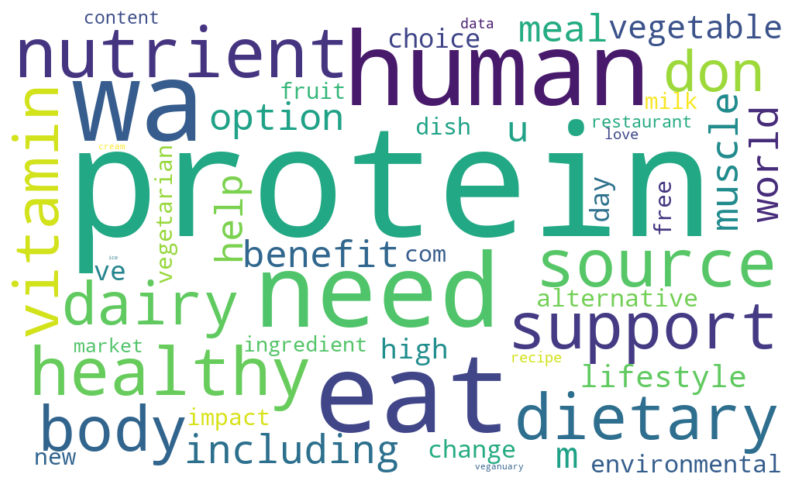

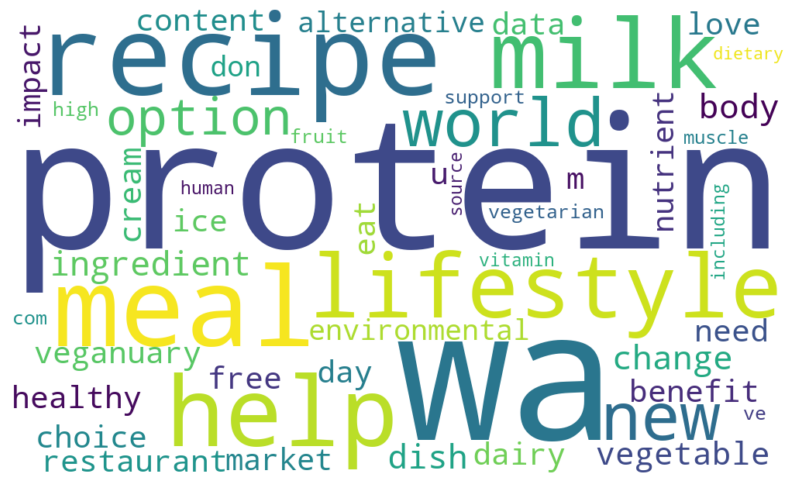

In [22]:
topics = ["neg","pos"]

List_of_WC=[]

for mytopic in topics:
    print(mytopic)

    tempdf = LemCVData[LemCVData['Sentiment'] == mytopic]
    #print(tempdf)
    
    tempdf =tempdf.sum(axis=0,numeric_only=True)
    #print(tempdf)
    
    #Make var name
    NextVarName=str("wc"+str(mytopic))
    #print( NextVarName)
    
    ##In the same folder as this code, I have three images
    ## They are called: food.jpg, bitcoin.jpg, and sports.jpg
    #next_image=str(str(mytopic) + ".jpg")
    #print(next_image)
    NextVarName = WordCloud(width=1000, height=600, background_color="white",
                   min_word_length=4, #mask=next_image,
                   max_words=200).generate_from_frequencies(tempdf)
    
    ## Here, this list holds all three wordclouds I am building
    List_of_WC.append(NextVarName)

    fig=plt.figure(figsize=(10, 10))
    plt.imshow(NextVarName, interpolation='bilinear')
    plt.axis("off")
    print(fig)
    